Import packages:

In [6]:
from itertools import combinations
from statannot import add_stat_annotation
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

Read all obtained tables with 'stable' days and create one dataframe with all samples:

In [7]:
folder_path = 'C:\\Users\\u201914\\Learning\\stable_days'

dfs = []

csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
for file in csv_files:
    df = pd.read_csv(os.path.join(folder_path, file))
    dfs.append(df)
df_all = pd.concat(dfs, ignore_index=True, sort=False).drop('Unnamed: 0', axis=1)
df_all.head(5)

,Mice,Genotype,day1,day2,day3,day4,day5,day6,day7,day8,...,day102,day103,day104,day105,day106,day107,day108,day109,day110,day111
0,L1,NADD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,23.0,30.0,NaN,41.0,37.0,36.0,34.0,27.0
1,L2,Intermediate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,L3,Intermediate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,L4,Intermediate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.0,30.0,24.0,NaN,25.0,NaN,36.0,NaN,36.0,NaN
4,L5,NADD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN


check that column "Genotype" has no unique items (typos in the names) apart needed groups

In [8]:
df_all['Genotype'].unique()

array(['NADD', 'Intermediate', 'ADD'], dtype=object)

Number of active days per each animal

In [9]:
df_activ = df_all.drop(columns=['Genotype'])
df_activ = df_all.fillna(0)

my_dict = df_activ.set_index('Mice').T.to_dict('list')
my_dict = {k: [x for x in v if x != 0] for k, v in my_dict.items()}

for k, v in my_dict.items():
    print(f"{k}: {len(v)}")

L1: 55
L2: 24
L3: 1
L4: 54
L5: 24
L6: 57
L7: 33
L8: 68
L9: 47
L10: 48
L11: 44
L12: 51
L13: 22
L14: 39
L15: 59
L16: 30
L17: 54
L18: 61
L19: 41
L20: 60
L21: 24
L22: 30
L23: 56
L24: 36
L25: 53
L26: 32
L27: 30
L28: 65
L29: 2
L30: 25
L31: 26
L32: 52
L33: 60
L34: 70
L35: 70
L36: 42
L37: 32
L38: 55
L39: 44
L40: 28
1a: 4
2a: 47
3a: 69
4a: 57
5a: 32
6a: 45
7a: 30
8a: 62
9a: 34
10a: 49
11a: 51
12a: 65
13a: 36
14a: 52
15a: 38
16a: 66
1b: 40
2b: 30
4b: 38
5b: 46
6b: 67
7b: 65
8b: 56
9b: 56
10b: 63
1c: 52
2c: 69
3c: 69
4c: 32
5c: 45
6c: 23
7c: 62
1C: 44
2C: 42
7C: 49
4C: 38
5C: 50
6C: 28
8C: 34
3C: 24
9C: 39
10C: 29
11C: 1
12C: 27


Make a plot with the distribution of the number of stable days per group: 

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Intermediate v.s. NADD: t-test independent samples with Bonferroni correction, P_val=9.185e-01 stat=1.032e+00
ADD v.s. Intermediate: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-2.291e-03
ADD v.s. NADD: t-test independent samples with Bonferroni correction, P_val=8.056e-01 stat=1.119e+00


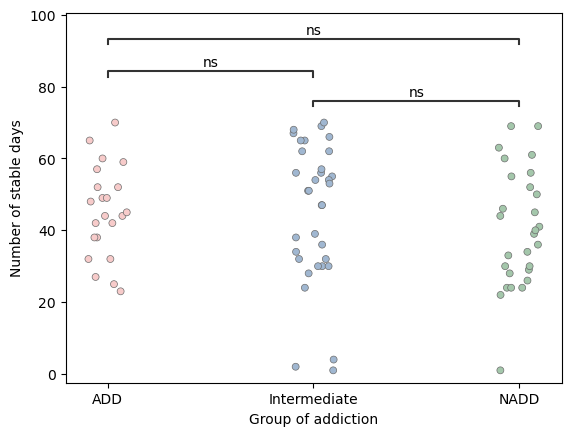

In [17]:
df3 = pd.DataFrame(list(my_dict.items()), columns=['Mice','Value'])
df3 = df3.set_index('Mice')
df3['Stable_days'] = df3['Value'].apply(len)

df4 = df_all[['Mice', 'Genotype']].copy()
df4.set_index('Mice')
df4 = df4.merge(df3.Stable_days, how='inner', on='Mice')
df4 = df4.sort_values(by = 'Genotype')

cities = ['NADD', 'Intermediate', 'ADD']
pairs = list(combinations(cities, r=2))
pairs

x='Genotype'
y='Stable_days'
colors = {'ADD': '#f7cbca',
          'NADD': '#a4c7ab',
          'Intermediate': '#a0b7d1'}
fig = plt.figure()
ax = fig.add_subplot()
ax = sns.stripplot(data=df4, x=x, y=y, 
                   palette=colors, 
                   edgecolor='gray',
                   linewidth=0.5)
ax.set(xlabel = 'Group of addiction', ylabel='Number of stable days')
test_results = add_stat_annotation(ax, data=df4, x=x, y=y,
                                   box_pairs=pairs,
                                   test='t-test_ind', text_format='star',
                                   loc='inside', verbose=2)
fig.savefig('stable_days.pdf')

Graph with the distribution of stable days throughout the addiction protocol:

Text(0, 0.5, 'Count')

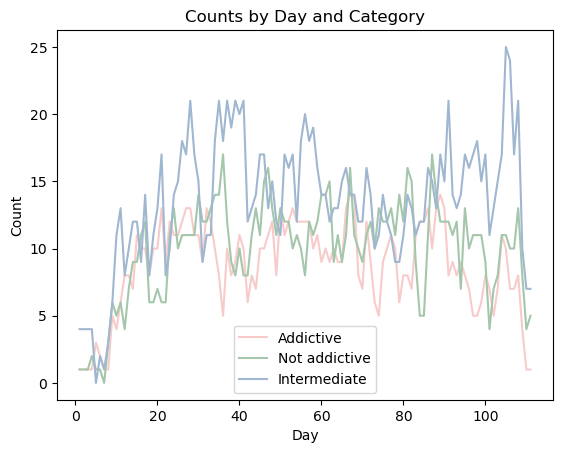

In [11]:
# Addictive group 
addictive = df_all[df_all['Genotype'] == 'ADD']
ad = addictive.describe()
count_row_add = ad.loc['count']

# Not Addictive group 
not_addictive = df_all[df_all['Genotype'] == 'NADD']
nad = not_addictive.describe()
count_row_nad = nad.loc['count']

# Intermediate group 
intermetiate = df_all[df_all['Genotype'] == 'Intermediate']
inrm = intermetiate.describe()
count_row_int = inrm.loc['count']

# Combine data into a single DataFrame
data_days = pd.DataFrame({
    'Addictive': count_row_add.values,
    'Not addictive': count_row_nad.values,
    'Intermediate': count_row_int.values
})
data_days.insert(0, 'Day', range(1, 1 +len(data_days)))

# create line plot for each category
colors_2 = {'Addictive': '#f7cbca',
          'Not addictive': '#a4c7ab',
          'Intermediate': '#a0b7d1'}
for column in data_days.columns[1:]:
    sns.lineplot(x='Day', y=column, 
                 data=data_days, 
                 label=column,
                 color=colors_2[column], 
                 ci=None)

# set title and labels
plt.title('Counts by Day and Category')
plt.xlabel('Day')
plt.ylabel('Count')


Pie chart with samples per group achived the criteria

In [12]:
data_add = [22, 0]
data_nadd = [26, 2]
data_int = [31, 3]
label= ['', ' ']
color_add = ['#F7CBCA']
color_nad = ['#A3C6AA', '#B5B2AA']
color_int = ['#9FB6D0', '#B5B2AA']
explode = (0, 0.1)  

PermissionError: [Errno 13] Permission denied: 'piechart.pdf'

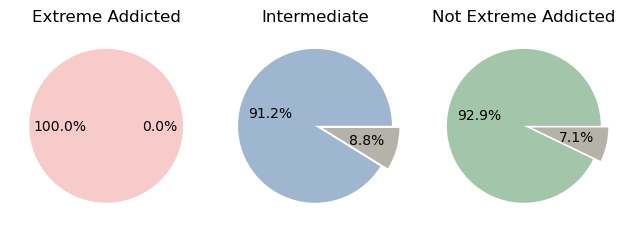

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3)
axes[0].pie(data_add, labels=label, colors=color_add, explode=explode, autopct='%1.1f%%')
axes[0].set_title('Extreme Addicted')
axes[1].pie(data_int, labels=label, colors=color_int, explode=explode, autopct='%1.1f%%')
axes[1].set_title('Intermediate')
axes[2].pie(data_nadd, labels=label, colors=color_nad, explode=explode, autopct='%1.1f%%')
axes[2].set_title('Not Extreme Addicted')
fig.tight_layout()
fig.savefig('piechart.pdf')